# scratch work

In [1]:
import jax

jax.config.update("jax_enable_x64", True)
import astropy.units as u
import jax.numpy as jnp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astroquery.jplhorizons import Horizons

from jorbit import Observations, Particle


In [2]:
nights = [Time("2025-01-01 07:00"), Time("2025-01-02 07:00"), Time("2025-01-05 07:00")]

times = []
for n in nights:
    times.extend([n + i * 1 * u.hour for i in range(3)])
times = Time(times)


# obj = Horizons(id="274301", location="695@399", epochs=times.utc.jd)
obj = Horizons(id="90377", location="695@399", epochs=times.utc.jd)
pts = obj.ephemerides(extra_precision=True, quantities="1")

coords = SkyCoord(pts["RA"], pts["DEC"], unit=(u.deg, u.deg))
times = Time(pts["datetime_jd"], format="jd", scale="utc")

[Text(0.5, 0, 'RA'), Text(0, 0.5, 'DEC')]

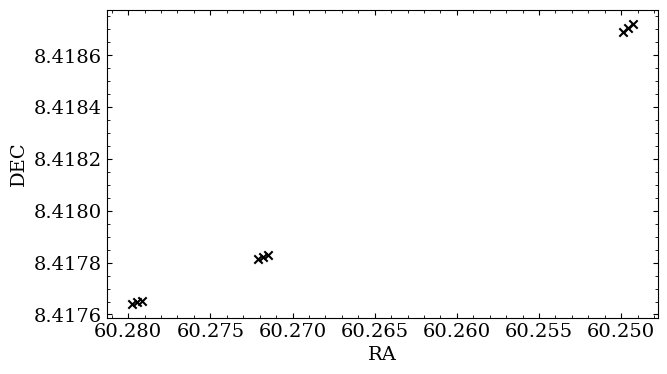

In [3]:
fig, ax = plt.subplots()
ax.scatter(coords.ra, coords.dec, c="k", marker="x")
ax.set_xlim(ax.get_xlim()[::-1])
ax.set(xlabel="RA", ylabel="DEC")

In [4]:
obs = Observations(
    observed_coordinates=coords,
    times=times,
    observatories="kitt peak",
    astrometric_uncertainties=1 * u.arcsec,
)
obs

Observations with 9 set(s) of observations

In [5]:
# obj = Horizons(id="274301", location="500@0", epochs=times.tdb.jd[0])
obj = Horizons(id="90377", location="500@0", epochs=times.tdb.jd[0])
vecs = obj.vectors(refplane="earth")
true_x0 = jnp.array([vecs["x"], vecs["y"], vecs["z"]]).T[0]
true_v0 = jnp.array([vecs["vx"], vecs["vy"], vecs["vz"]]).T[0]
true_x0, true_v0

(Array([40.298248  , 71.80844307, 12.46825354], dtype=float64),
 Array([-0.00247257,  0.00048492,  0.00042657], dtype=float64))

In [7]:
# p0 = Particle(
#     x=true_x0, v=true_v0, time=times[0], name="274301 Wikipedia", observations=obs
# )
p0 = Particle(
    x=true_x0, v=true_v0, time=times[0], name="90377 Sedna", observations=obs
)
p0

Particle: 90377 Sedna

In [8]:
p1 = p0.max_likelihood(verbose=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =          100

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16146D+03    |proj g|=  1.18426D+07


 This problem is unconstrained.



At iterate    1    f=  9.14800D+02    |proj g|=  2.61490D+06

At iterate    2    f=  4.52218D+02    |proj g|=  1.55262D+06

At iterate    3    f=  1.71587D+02    |proj g|=  1.72451D+03

At iterate    4    f=  1.71586D+02    |proj g|=  2.55550D+02

At iterate    5    f=  1.71586D+02    |proj g|=  6.26013D+02

At iterate    6    f=  1.71586D+02    |proj g|=  1.93038D+03

At iterate    7    f=  1.71586D+02    |proj g|=  5.02296D+03

At iterate    8    f=  1.71586D+02    |proj g|=  9.52905D+03

At iterate    9    f=  1.71584D+02    |proj g|=  1.71299D+04

At iterate   10    f=  1.71580D+02    |proj g|=  2.92355D+04

At iterate   11    f=  1.71568D+02    |proj g|=  4.89433D+04

At iterate   12    f=  1.71539D+02    |proj g|=  8.07487D+04

At iterate   13    f=  1.71461D+02    |proj g|=  1.32247D+05

At iterate   14    f=  1.71259D+02    |proj g|=  2.15471D+05

At iterate   15    f=  1.70733D+02    |proj g|=  3.49869D+05

At iterate   16    f=  1.69374D+02    |proj g|=  5.66141D+05

At iter

In [9]:
p1.residuals(p1.cartesian_state), p0.residuals(p0.cartesian_state)

(Array([[-2.85878697e-07, -9.41375956e-08],
        [ 2.27149607e-10,  4.53949813e-07],
        [ 2.57722802e-07, -2.01944932e-07],
        [ 5.58371131e-07,  1.27356294e-07],
        [ 3.13568519e-07, -2.01114737e-07],
        [-8.33458029e-07, -1.70905569e-07],
        [-7.02797991e-07,  2.99354194e-07],
        [ 9.04233744e-07,  1.03798204e-06],
        [ 7.02031446e-09, -1.00865544e-06]], dtype=float64),
 Array([[-1.47200117e-06,  1.07532008e-06],
        [-1.18933989e-06,  1.49255446e-06],
        [-9.10482747e-07,  7.05574422e-07],
        [ 1.01598318e-06, -9.71389347e-07],
        [ 7.29844464e-07, -1.38023574e-06],
        [-4.38202549e-07, -1.43192019e-06],
        [-1.74874341e-07, -9.56226198e-08],
        [ 1.30691672e-06,  7.22190964e-07],
        [ 3.07147170e-07, -1.24653535e-06]], dtype=float64))

In [10]:
p1.keplerian_state, p0.keplerian_state

(KeplerianState(semi=Array([499.71376153], dtype=float64), ecc=Array([0.84735948], dtype=float64), inc=Array([11.9285386], dtype=float64), Omega=Array([144.40082898], dtype=float64), omega=Array([311.09150915], dtype=float64), nu=Array([324.74667053], dtype=float64), time=np.float64(2460676.792467407)),
 KeplerianState(semi=Array([506.419829], dtype=float64), ecc=Array([0.84954883], dtype=float64), inc=Array([11.92852394], dtype=float64), Omega=Array([144.40149979], dtype=float64), omega=Array([311.28485567], dtype=float64), nu=Array([324.55266997], dtype=float64), time=np.float64(2460676.792467407)))

In [7]:
print(p0.cartesian_state)
print(p0.keplerian_state)

CartesianState(x=Array([[-2.00572335,  1.77860137,  0.5197407 ]], dtype=float64), v=Array([[-0.00665991, -0.00662871, -0.00203885]], dtype=float64), time=np.float64(2460676.792467407))
KeplerianState(semi=Array([2.37859645], dtype=float64), ecc=Array([0.14924503], dtype=float64), inc=Array([6.73363769], dtype=float64), Omega=Array([183.37295038], dtype=float64), omega=Array([140.26385356], dtype=float64), nu=Array([173.65462829], dtype=float64), time=np.float64(2460676.792467407))


In [8]:
p0.residuals(p0.cartesian_state)

Array([[-5.48984888e-07, -8.18277875e-07],
       [-5.13875491e-07,  1.24301596e-06],
       [ 6.48965954e-07,  7.21209875e-07],
       [-1.35422083e-07, -5.83186863e-07],
       [-9.23311518e-07,  7.77410054e-07],
       [-7.94082187e-07,  1.82005583e-07],
       [-8.97508853e-07, -6.82596246e-07],
       [ 3.13827570e-07,  9.46950557e-07],
       [-6.94264774e-07,  3.33480618e-07]], dtype=float64)

In [9]:
p0.loglike(p0.cartesian_state)

Array(-16.5408936, dtype=float64)

In [10]:
jax.grad(p0.loglike)(p0.cartesian_state)

CartesianState(x=Array([[-0.17490244, -0.31958406, -0.21653323]], dtype=float64), v=Array([[-0.34285022, -0.64230222, -0.30679037]], dtype=float64), time=Array(-0.00342397, dtype=float64))

In [11]:
x = jnp.concatenate([p0.cartesian_state.x.flatten(), p0.cartesian_state.v.flatten()])
p0.scipy_objective(x / p0.fit_scales)

Array(16.5408936, dtype=float64)

In [12]:
x = jnp.concatenate([p0.cartesian_state.x.flatten(), p0.cartesian_state.v.flatten()])
p0.scipy_objective_grad(x / p0.fit_scales)

Array([-0.3508416 ,  0.56848201,  0.11255093, -0.00226829, -0.00428758,
       -0.00063009], dtype=float64)

In [13]:
x / p0.fit_scales

Array([0.99989828, 0.99987798, 0.99991297, 1.00663733, 0.9930172 ,
       0.99271124], dtype=float64)